In [127]:
from gensim.models.word2vec import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import os, json, tqdm, re, itertools, nltk, pprint, pickle
from collections import Counter
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_file(file_path):
    all_words_from_files = []
    with open (file_path) as file:
        json_content = json.load(file)
        item_count = 0
        for item in json_content:
            if item_count < 10:
                item_count += 1
                text_content = re.sub("<.*?>", "", item["textContent"])
                text_content = text_content.replace('-\n', '')
                text_content = text_content.replace("\n", '')
                
#                 print (text_content)
#             text_content = [word for word in text_content if len(word) > 0]
            all_words_from_files.append(text_content)
    
    return all_words_from_files
       
        
def read_all_judgments_from_2018(path):
    all_judgments = []
    for filename in tqdm.tqdm(os.listdir(path)):
        judgments = read_file(path + filename)
        all_judgments.append(judgments)
    return all_judgments

# We need a stream of sentences
def flatten_judgments(words):
    chain = list(itertools.chain(*words))
    result = []
    for judgment in chain:
        for word in judgment:
            result.append(word)
    return result
        

In [4]:
words = read_all_judgments_from_2018("../data_filtered_2/")

100%|██████████| 11/11 [00:00<00:00, 23.57it/s]


In [5]:
content = []
for judgment in words:
    for word in judgment:
        content.append(word)
content = " ".join(content)

In [26]:
from nltk.tokenize import TweetTokenizer, sent_tokenize
nltk.download('punkt')

tokenizer_words = TweetTokenizer(preserve_case=False)
tokens_sentences = [tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(content)]


[nltk_data] Downloading package punkt to /home/grzegorz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
print(tokens_sentences[:10])

[['uzasadnienie', 'powód', '(', '...', ')', 'sp', '.'], ['z', 'o', '.', 'o', '.'], ['sp', '.'], ['k', '.', 'z', 'siedzibą', 'w', 'p', '.', 'wniósł', 'o', 'zwolnienie', 'spod', 'egzekucji', 'administracyjnej', 'prawa', 'majątkowego', 'przysługującego', 'powodowi', 'w', 'postaci', 'wierzytelności', 'z', 'tytułu', 'nienależnie', 'pobranego', 'podatku', 'akcyzowego', 'za', 'miesiące', 'luty', ',', 'marzec', ',', 'kwiecień', ',', 'maj', ',', 'wrzesień', 'i', 'październik', '2011', 'r', '.', 'określonego', 'w', 'decyzji', 'naczelnika', 'urzędy', 'celnego', 'w', 'z', '.', 'z', 'dnia', '6', 'lutego', '2013', 'r', '.', 'nr', '(', '...', ')', '-', '(', '...', ')', '9110-414', '/', '12/13', '/', 'dn', 'oraz', 'dyrektora', 'izby', 'celnej', 'w', 'r', '.', 'z', 'dnia', '8', 'kwietnia', '2014', 'r', '.', 'nr', '(', '...', ')', '-', '(', '...', ')', '-24/13', '/', '14', ',', 'która', 'został', 'stwierdzona', 'prawomocnym', 'wyrokiem', 'wojewódzkiego', 'sądu', 'administracyjnego', 'w', 'g', '.', 'z', 

In [52]:
bigrams = Phrases(tokens_sentences, threshold=10.0)

In [66]:
bigram_counter = Counter()
for key in bigrams.vocab.keys():
    key_str = str(key)
    splited = key_str.split("_")
    if len(splited)>1:
        bigram_counter[key] += bigrams.vocab[key]

for key, counts in bigram_counter.most_common(100):
    print (str(key, "utf_8") + " " + str(counts))

k_. 39166
,_że 20844
art_. 20079
(_... 15453
..._) 15357
r_. 15096
._, 13399
m_. 12940
p_. 11646
._( 11637
z_dnia 11213
)_. 10722
)_, 9391
,_a 8534
c_. 8331
._p 8292
._k 8239
j_. 8190
§_1 8064
1_) 7987
,_iż 7531
,_w 7519
(_1 7301
._c 7169
a_. 6948
._w 6893
s_. 6693
w_dniu 6282
d_. 6208
._n 5914
2017_roku 5829
ust_. 5720
na_podstawie 5648
n_. 5578
w_. 5311
z_art 4887
roku_, 4842
,_k 4737
w_sprawie 4639
do_pracy 4156
2015_roku 4093
w_tym 4033
)_w 3975
._m 3710
,_z 3537
podstawie_art 3518
,_- 3513
,_nie 3260
g_. 3212
1_k 3175
na_k 3157
._d 3016
,_co 2998
zw_. 2970
w_okresie 2928
–_k 2907
w_zw 2882
._s 2861
ubezpieczeń_społecznych 2854
,_na 2804
od_dnia 2674
2016_roku 2673
zł_, 2617
działalności_gospodarczej 2595
1_kk 2532
(_k 2511
zgodnie_z 2491
._i 2465
w_postaci 2376
poz_. 2355
,_czy 2315
na_rzecz 2292
,_które 2272
tj_. 2266
się_do 2265
się_w 2239
sąd_rejonowy 2238
,_poz 2202
._na 2160
zł_. 2152
,_jak 2151
u_. 2109
się_z 2099
f_. 2068
._) 2041
v_. 2041
2014_roku 2038
,_który 2023
protok

In [22]:
trigrams = Phrases(phrases[tokens_sentences], threshold=1.0)


/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [65]:
trigram_counter = Counter()
for key in trigrams.vocab.keys():
    key_str = str(key)
    splited = key_str.split("_")
    if len(splited)>2:
        trigram_counter[key] += trigrams.vocab[key]

for key, counts in trigram_counter.most_common(100):
    print (str(key, "utf-8") + " " + str(counts))

W_ocenie_Sądu 1170
13_grudnia_2017 1094
7_lipca_2016 1001
4_lutego_2015 1001
przy_prowadzeniu_działalności_gospodarczej 1001
w_niniejszej_sprawie 935
w_ruchu_lądowym 916
dnia_13_grudnia 913
,_jak_również 907
,_co_następuje 860
279_§_1 833
w_ruchu_drogowym 830
o_numerze_rejestracyjnym 829
numerze_rejestracyjnym_( 828
marca_2007_roku 820
w_dniu_19 796
co_następuje_: 768
do_ubezpieczeń_społecznych 746
w_stanie_nietrzeźwości 739
177_§_1 731
dniu_7_lipca 728
dniu_19_lutego 728
o_systemie_ubezpieczeń 680
systemie_ubezpieczeń_społecznych 680
km_/_h 667
popełnienia_zarzucanego_mu_czynu 649
dnia_4_lutego 644
do_słów_„ 643
,_I_PK 642
278_§_1 641
roku_ubezpieczona_była 638
Sąd_Rejonowy_w 620
W_IMIENIU_RZECZYPOSPOLITEJ 588
,_zeznania_świadka 577
na_ubezpieczenia_społeczne 554
do_popełnienia_zarzucanego 554
działalności_gospodarczej_. 553
e_-_protokół 549
/_decyzja_z 547
na_przeciwległy_pas 546
przeciwległy_pas_ruchu 546
kwietnia_2016r_. 546
28_ust_. 546
przez_stronę_pozwaną 515
IMIENIU_RZECZYPOSPO

In [61]:
sentences_transformed = [trigrams[sentence] for sentence in tokens_sentences]

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [63]:
print(sentences_transformed[:10])

[['uzasadnienie', 'powód', '(_...', ')_sp', '.'], ['z', 'o', '.', 'o', '.'], ['sp', '.'], ['k', '.', 'z_siedzibą', 'w', 'p', '.', 'wniósł_o', 'zwolnienie', 'spod_egzekucji', 'administracyjnej', 'prawa', 'majątkowego', 'przysługującego', 'powodowi', 'w_postaci', 'wierzytelności', 'z_tytułu', 'nienależnie_pobranego', 'podatku', 'akcyzowego', 'za_miesiące', 'luty', ',', 'marzec', ',', 'kwiecień', ',', 'maj', ',', 'wrzesień_i', 'październik_2011', 'r', '.', 'określonego_w', 'decyzji', 'naczelnika', 'urzędy', 'celnego', 'w', 'z', '.', 'z_dnia', '6', 'lutego_2013', 'r', '.', 'nr_(', '..._)', '-', '(_...', ')', '9110-414', '/', '12/13', '/', 'dn', 'oraz', 'dyrektora', 'izby', 'celnej', 'w', 'r', '.', 'z_dnia', '8', 'kwietnia_2014', 'r', '.', 'nr_(', '..._)', '-', '(_...', ')', '-24/13', '/', '14', ',', 'która', 'został', 'stwierdzona', 'prawomocnym_wyrokiem', 'wojewódzkiego', 'sądu', 'administracyjnego', 'w', 'g', '.', 'z_dnia', '6', 'lipca_2016', 'r', '.', 'sygn', '.'], ['akt', 'i', 'sa', '/

In [74]:
files = os.listdir(".")
if "word2vec_model.pickle" in files:
    with open("word2vec_model.pickle", "rb") as file:
        word2vc_model = pickle.load(file)
else:
    word2vec_model = Word2Vec(sentences=sentences_transformed, window=5, size=300, sg=0, workers=8, min_count=3)
    with open("word2vec_model.pickle", "wb") as file:
        pickle.dump(word2vec_model, file)

In [92]:
word2vec_model.most_similar("sąd")

word_vectors = word2vec_model.wv
del word2vec_model

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [93]:
word2vec_model = word_vectors

In [101]:
#Znajdź 3 najbardziej podobne wyrażenia (słowa i zwroty) dla następujących wyrażeń:
similar_phrases = ["sąd_najwyższy", "trybunał_konstytucyjny", "kodeks_cywilny",
                  "kpk", "sąd_rejonowy","szkoda", "wypadek", "kolizja",
                   "szkoda_majątkowa", "nieszczęście", "rozwód"]

for phrase in similar_phrases:
    if phrase in word2vec_model:
        print (phrase )
        pprint.pprint (word2vec_model.most_similar(phrase))
        print ()

kpk
[('§_1a', 0.8561893105506897),
 ('zakres_uzasadnienia', 0.8249825239181519),
 ('423', 0.8178547024726868),
 ('ograniczono_do', 0.771358072757721),
 ('118', 0.7288931608200073),
 ('624', 0.7202829718589783),
 ('824', 0.7137531042098999),
 ('pkt_3', 0.708715558052063),
 ('zd', 0.6514341235160828),
 ('201', 0.6396523714065552)]

sąd_rejonowy
[('szczecin', 0.6377477049827576),
 ('uzasadnieniu', 0.6357685327529907),
 ('sąd', 0.6321263313293457),
 ('klauzulę', 0.5851562023162842),
 ('szczecinie', 0.5778356194496155),
 ('podnosiła', 0.5671849250793457),
 ('lublin', 0.5614820718765259),
 ('szczytnie', 0.5437789559364319),
 ('giżycku', 0.5426311492919922),
 (':_a', 0.5352632403373718)]

szkoda
[('uzasadnia', 0.6910620331764221),
 ('wykazuje', 0.676764965057373),
 ('dotyczył', 0.671521782875061),
 ('powoduje', 0.6512223482131958),
 ('mają', 0.6446118354797363),
 ('faktem', 0.6416028141975403),
 ('powodowie', 0.6382654905319214),
 ('zachodziły', 0.6372725963592529),
 ('pozbawia', 0.6332595944

In [111]:
# Znajdź wypadkową operacji na słowach (5 najbliższych wyników)
#Sąd Najwyższy - kpc + konstytucja
#pasażer - mężczyzna + kobieta
#samochód - droga + rzeka

# first = word2vec_model["sąd_najwyższy"] - word2vec_model["kpc"] + word2vec_model["konstytucja"]
# word2vec_model.similar_by_vector(first)

# second = word2vec_model["pasażer"] - word2vec_model["mężczyzna"] + word2vec_model["kobieta]
# word2vec_model.similar_by_vector(second)
# 
# third = word2vec_model["samochód"] - word2vec_model["droga"] + word2vec_model["rzeka"]
# word2vec_model.similar_by_vector(third)

KeyError: "word 'rzeka' not in vocabulary"

In [116]:
tsne = TSNE(n_components=2, n_jobs=8)
tsne.fit(word2vec_model.vectors)

In [126]:
words_to_plot = ["szkoda", 
#                  "strata", 
                 "uszczerbek", 
#                  "szkoda_majątkowa", 
#                  "uszczerbek_na_zdrowiu",
                  "krzywda"]
#                  "niesprawiedliwość", 
#                  "nieszczęście"]

vectors_to_plot = np.array([word2vec_model[word] for word in words_to_plot])
vectors_transformed = tsne.fit_transform(vectors_to_plot)


In [133]:
vectors_transformed

array([[-5134.78852633, -2447.06854698],
       [ 4695.7464671 , -3228.10294493],
       [  439.04205923,  5675.17149191]])

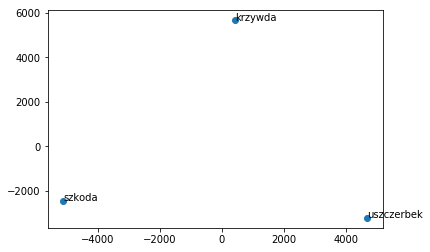

In [139]:
fig, ax = plt.subplots()
ax.scatter(vectors_transformed[:,0], vectors_transformed[:,1])

for i, txt in enumerate(words_to_plot):
    ax.annotate(txt, (vectors_transformed[:,0][i], vectors_transformed[:,1][i]))

plt.show()